## Exploring Catagorical Features

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [2]:
df = pd.read_excel("clean_data.xls")

Starting with *LIMIT_BAL* and *AGE*

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002076B1AB9E8>,
      dtype=object)

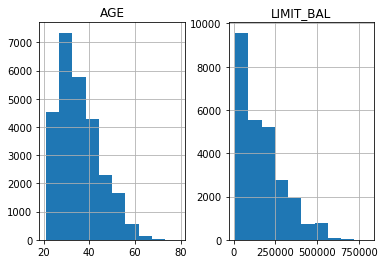

In [6]:
#df['LIMIT_BAL'].hist()
df[['LIMIT_BAL', 'AGE']].hist()

In [7]:
df[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


EDUCATION

In [8]:
df['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

From the Data Description we see that the values 0, 5 and 6 for education are undocumented. We replace these with 4 (others)

In [9]:
df['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)

In [10]:
df['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

MARRIAGE

In [12]:
df['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

Value 0 is not documented, replace with 3 (others)

In [13]:
df['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)

In [14]:
df['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Checking default rate within Education

Text(0.5,0,'Education Level')

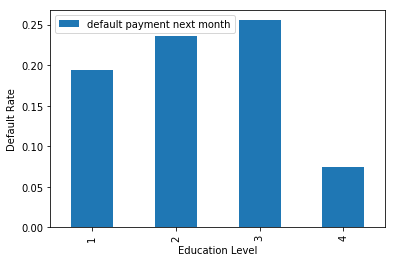

In [15]:
df.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar()
plt.ylabel('Default Rate')
plt.xlabel('Education Level')

Performing One-hot encoding (OHE) on EDUCATION for more complex models

In [17]:
edu_mapping = {1: 'graduate school', 2: 'university', 3: 'high school', 4: 'others'}

In [18]:
df['EDUCATION_CAT'] = df['EDUCATION'].map(edu_mapping)

In [20]:
df[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [21]:
edu_ohe = pd.get_dummies(df['EDUCATION_CAT'])

In [22]:
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [23]:
df_ohe = pd.concat([df, edu_ohe], axis=1)

In [25]:
df_ohe.to_excel("clean_data_withOHE.xls")

## Exploring Financial Features

The remaining financial features are in 3 groups: 1. Status of montly payments, 2. Billed Amound, 3. Paid Amount

### 1. Status of monthly payments

In [28]:
pay_feat = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [29]:
df[pay_feat].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


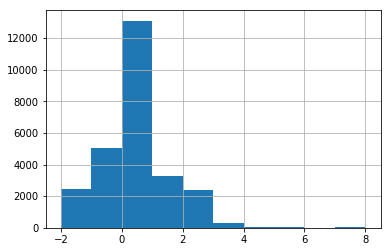

In [30]:
df['PAY_1'].hist()

Most people are in good standing (-2, -1, 0). Others have paid in a short time.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002076ADA97B8>,
      dtype=object)

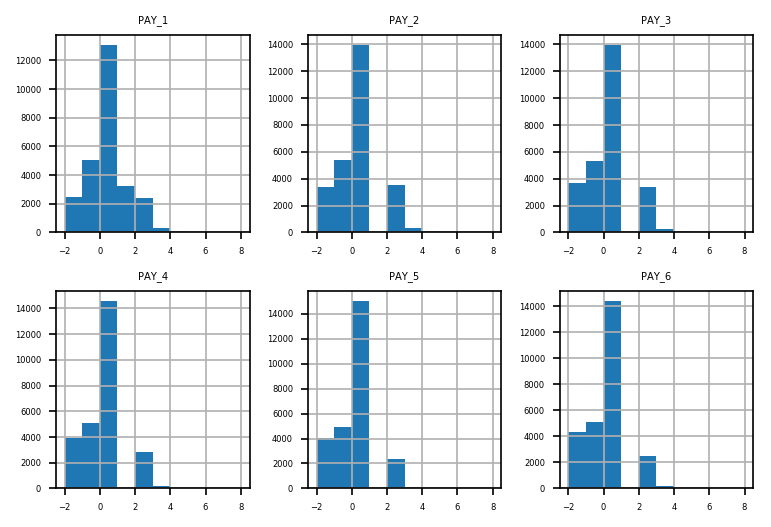

In [37]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 4
df[pay_feat].hist(layout =(2,3))

#### NOTE : We see 2 month payment delay in Sept (PAY_1), but no 1 month payment delay for Aug (PAY_2) 

In [38]:
bill_feat = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002076C0A8C88>,
      dtype=object)

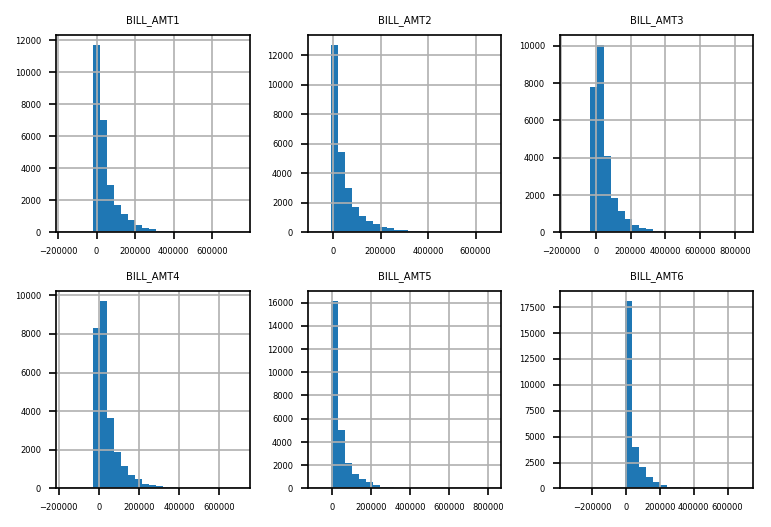

In [41]:
df[bill_feat].hist(layout = (2,3), bins=25)

In [43]:
df[bill_feat].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


#### No inconsistency seems to appear for the Billed Amount 

In [44]:
amt_feat = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [46]:
df[amt_feat].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002076E9AC898>,
      dtype=object)

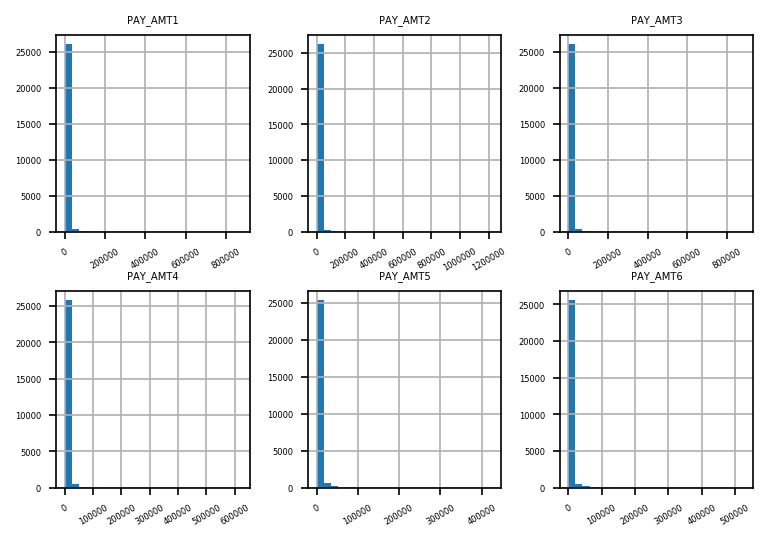

In [47]:
df[amt_feat].hist(layout = (2,3), bins=25, xrot=30)

#### Not informative enough. Let's check howmany 0's are included

In [48]:
zero_mask = df[amt_feat] == 0

In [49]:
zero_mask.sum()

PAY_AMT1    4656
PAY_AMT2    4833
PAY_AMT3    5293
PAY_AMT4    5697
PAY_AMT5    5981
PAY_AMT6    6373
dtype: int64

We try to view the amounts as base10-log transform. This will tell us the size of the amount. It is important to not consider 0 as log(0) is undefined!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002076FD92860>,
      dtype=object)

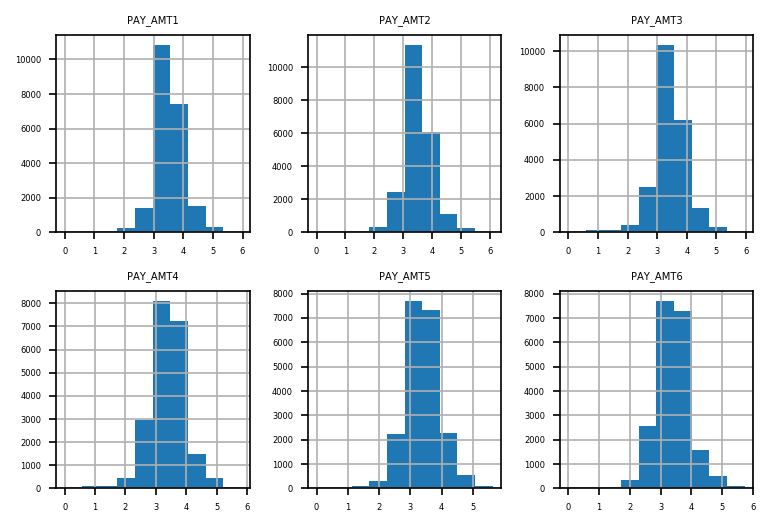

In [53]:
df[amt_feat][~zero_mask].apply(np.log10).hist(layout = (2,3))

#### This provides more information in terms of the amounts paid. We can see amounts from 10s to Millions (six 0's)